In [1]:
import os
# Get the current working directory
current_dir = os.getcwd()
# Set the data directory to the parent directory of the current working directory
wdir = os.path.dirname(current_dir)
# Change the current working directory to the parent directory
os.chdir(wdir)

In [2]:
import sys
sys.path.append('src')
import muller
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams


In [3]:
# Set the font globally
rcParams['font.family'] = 'Arial'
rcParams['font.size'] = 9
rcParams['axes.titlesize'] = 9
rcParams['axes.labelsize'] = 9
rcParams['xtick.labelsize'] = 9
rcParams['ytick.labelsize'] = 9
rcParams['legend.fontsize'] = 9

In [4]:
def cm2inch(x): return float(x)/2.54

plotwidth    = cm2inch(8.90)


In [5]:
# Load data muller plots
# pc 0.0004
df_pop_0 = pd.read_csv('data/Suplementary_Fig_4/populations_df_cd_0.0004_bf_m_0.0001_ts_2.csv');
df_adj_0 = pd.read_csv('data/Suplementary_Fig_4/df_adj_cd_0.0004_bf_m_0.0001_ts_2.csv');
df_size_0 = pd.read_csv('data/Suplementary_Fig_4/variant_size_df_cd_0.0004_bf_m_0.0001_ts_2.csv');
# pc 0.0037
df_pop_1 = pd.read_csv('data/Suplementary_Fig_4/populations_df_cd_0.0037_bf_m_0.0001_ts_2.csv');
df_adj_1 = pd.read_csv('data/Suplementary_Fig_4/df_adj_cd_0.0037_bf_m_0.0001_ts_2.csv');
df_size_1 = pd.read_csv('data/Suplementary_Fig_4/variant_size_df_cd_0.0037_bf_m_0.0001_ts_2.csv');
# 0.007
df_pop_2 = pd.read_csv('data/Suplementary_Fig_4/populations_df_cd_0.007_bf_m_0.0001_ts_2.csv');
df_adj_2 = pd.read_csv('data/Suplementary_Fig_4/df_adj_cd_0.007_bf_m_0.0001_ts_2.csv');
df_size_2 = pd.read_csv('data/Suplementary_Fig_4/variant_size_df_cd_0.007_bf_m_0.0001_ts_2.csv');

# Load data average number of mutations
# pc 0.0004
times_ = np.loadtxt("data/Suplementary_Fig_4/time.txt")
fraction_mut_variant_res_pop_0 = np.loadtxt("data/Suplementary_Fig_4/fraction_mut_variant_0.0004_bf_m_0.0001_ts_2.txt")
j1_pop_0  = np.loadtxt("data/Suplementary_Fig_4/jump_1_0.0004_bf_m_0.0001_ts_2.txt")
slope_pop_0  = np.loadtxt("data/Suplementary_Fig_4/slope_0.0004_bf_m_0.0001_ts_2.txt")
rare_events_pop_0 =np.loadtxt("data/Suplementary_Fig_4/rare_events_0.0004_bf_m_0.0001_ts_2.txt");
# pc 0.0037
fraction_mut_variant_res_pop_1 = np.loadtxt("data/Suplementary_Fig_4/fraction_mut_variant_0.0037_bf_m_0.0001_ts_2.txt")
j1_pop_1  = np.loadtxt("data/Suplementary_Fig_4/jump_1_0.0037_bf_m_0.0001_ts_2.txt")
j2_pop_1  = np.loadtxt("data/Suplementary_Fig_4/jump_2_0.0037_bf_m_0.0001_ts_2.txt")
slope_pop_1  = np.loadtxt("data/Suplementary_Fig_4/slope_0.0037_bf_m_0.0001_ts_2.txt")
rare_events_pop_1 =np.loadtxt("data/Suplementary_Fig_4/rare_events_0.0037_bf_m_0.0001_ts_2.txt");
# 0.007
fraction_mut_variant_res_pop_2 = np.loadtxt("data/Suplementary_Fig_4/fraction_mut_variant_0.007_bf_m_0.0001_ts_2.txt")
j1_pop_2  = np.loadtxt("data/Suplementary_Fig_4/jump_1_0.007_bf_m_0.0001_ts_2.txt")
j2_pop_2  = np.loadtxt("data/Suplementary_Fig_4/jump_2_0.007_bf_m_0.0001_ts_2.txt")
slope_pop_2  = np.loadtxt("data/Suplementary_Fig_4/slope_0.007_bf_m_0.0001_ts_2.txt")
rare_events_pop_2 =np.loadtxt("data/Suplementary_Fig_4/rare_events_0.007_bf_m_0.0001_ts_2.txt");


/var/folders/ss/2frlt8v119514lf5x00hdshh0000gn/T/ipykernel_18242/3076926797.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels())


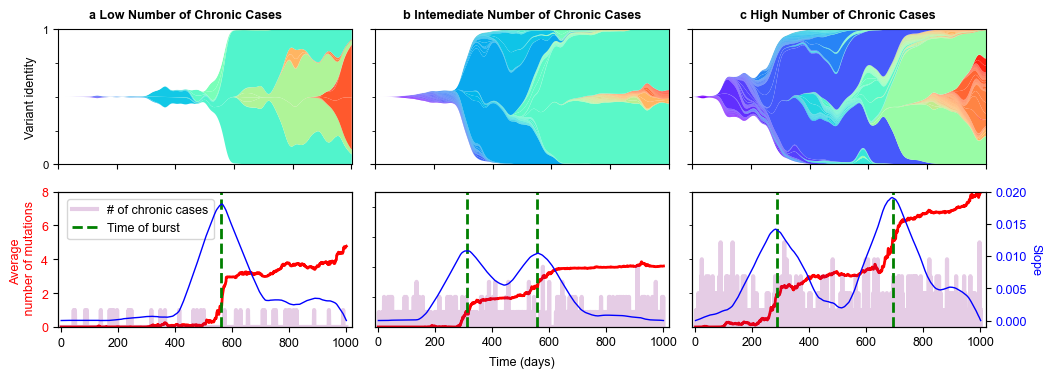

In [6]:
fig, axs = plt.subplots(2, 3, figsize=(3*plotwidth, plotwidth))  # 2 rows, 3 columns
fig.text(0.5,0.0, 'Time (days)', ha='center', va='center')



# muller plot in axs[0, 0]
number_of_variants=len(df_adj_0)+1
norm_range = (1, number_of_variants)

color_data = {}

for i in range(number_of_variants):
    key = str(i+1)
    value = float(i+1)
    color_data[key] = value

color_by_id = pd.Series(color_data,name='Variant identity')
muller._muller_plot(df_pop_0, df_adj_0, color_by_id, smoothing_std=10, colormap='rainbow', normalize=True, norm_range=norm_range, ax=axs[0,0])
axs[0, 0].set_yticklabels((0,1))
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels())
axs[0, 0].set_xlabel('')
axs[0, 0].set_ylabel('Variant identity')
axs[0, 0].set_xlabel('')
axs[0, 0].set_xticklabels('')

# muller plot in axs[0, 1]
number_of_variants=len(df_adj_1)+1
norm_range = (1, number_of_variants)

color_data = {}
# Replace the range limit with your desired number (e.g., 30)
for i in range(number_of_variants):
    key = str(i+1)
    value = float(i+1)
    color_data[key] = value
color_by_id = pd.Series(color_data,name='Variant identity')

muller._muller_plot(df_pop_1, df_adj_1, color_by_id, smoothing_std=10, colormap='rainbow', normalize=True, norm_range=norm_range, ax=axs[0, 1])
axs[0, 1].set_yticklabels('')
axs[0, 1].set_xticklabels('')
axs[0, 1].set_xlabel('')
axs[0, 1].set_ylabel('')
axs[0, 1].set_xlabel('')
axs[0, 1].set_xticklabels('')

# muller plot in axs[0, 2]
number_of_variants=len(df_adj_2)+1
norm_range = (1, number_of_variants)

color_data = {}
# Replace the range limit with your desired number (e.g., 30)
for i in range(number_of_variants):
    key = str(i+1)
    value = float(i+1)
    color_data[key] = value
color_by_id = pd.Series(color_data,name='Variant identity')

muller._muller_plot(df_pop_2, df_adj_2, color_by_id,smoothing_std=10, colormap='rainbow', normalize=True, norm_range=norm_range, ax=axs[0, 2])
axs[0, 2].set_yticklabels('')
axs[0, 2].set_xticklabels('')
axs[0, 2].set_xlabel('')
axs[0, 2].set_ylabel('')
axs[0, 2].set_xlabel('')


##########
# Plot in the specified subplot axs[1, 0]
ax1 = axs[1, 0]  # Choose the specific subplot
# First plot on primary y-axis
ax1.plot(times_, fraction_mut_variant_res_pop_0, color='red', lw=2, label="")
ax1.plot(times_, rare_events_pop_0, color='purple', lw=3, alpha=0.2, label="# of chronic cases")
ax1.set_ylabel("Average \n number of mutations", color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.grid(False)
ax1.set_xlim([-10,1020])
ax1.set_ylim([0,8])
# Secondary y-axis
ax2 = ax1.twinx()
ax2.plot(times_, slope_pop_0, color='blue', lw=1, label="")
ax2.set_ylabel("")
ax2.set_yticks([])
ax2.set_ylim([-0.001, 0.02])
# Vertical lines for time of burst
ax1.axvline(x=j1_pop_0, color='green', lw=2, linestyle='--', label="Time of burst")
# Collecting legends from both axes and positioning them within the figure
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(0.01, 0.99), ncol=1)
# Setting xticks
ax1.set_xticks(np.arange(0, 1010, 200))
# Show the plot


# Plot in the specified subplot axs[1, 1]
ax1_1 = axs[1, 1]  # Choose the specific subplot

# First plot on primary y-axis
ax1_1.plot(times_, fraction_mut_variant_res_pop_1, color='red', lw=2)
ax1_1.plot(times_, rare_events_pop_1, color='purple', lw=3, alpha=0.2)
ax1_1.grid(False)
ax1_1.set_xlim([-10,1020])
ax1_1.set_ylim([0,9])
ax1_1.set_yticks([])
# Vertical lines for time of burst
ax1_1.axvline(x=j1_pop_1, color='green', lw=2, linestyle='--', label="")
ax1_1.axvline(x=j2_pop_1, color='green', lw=2, linestyle='--')
ax1_1.set_xticks(np.arange(0, 1010, 200))

# Secondary y-axis
ax2_1 = ax1_1.twinx()
ax2_1.plot(times_, slope_pop_1, color='blue', lw=1, label="")
ax2_1.set_ylabel("")
#ax2.set_ylabel("Slope", color='blue')
ax2_1.set_yticks([])
ax2_1.set_ylim([-0.001, 0.02])

# Plot in the specified subplot axs[1, 2]
ax1_2 = axs[1, 2]  # Choose the specific subplot

# First plot on primary y-axis
ax1_2.plot(times_, fraction_mut_variant_res_pop_2, color='red', lw=2)
ax1_2.plot(times_, rare_events_pop_2, color='purple', lw=3, alpha=0.2)
ax1_2.grid(False)
ax1_2.set_xlim([-10,1020])
ax1_2.set_ylim([0,8])
ax1_2.set_yticks([])

# Vertical lines for time of burst
ax1_2.axvline(x=j1_pop_2, color='green', lw=2, linestyle='--', label="")
ax1_2.axvline(x=j2_pop_2, color='green', lw=2, linestyle='--')
ax1_2.set_xticks(np.arange(0, 1010, 200))


# Secondary y-axis
ax2_2 = ax1_2.twinx()
ax2_2.plot(times_, slope_pop_2, color='blue', lw=1)
ax2_2.set_ylabel("Slope", color='blue',rotation=270,labelpad=10)
ax2_2.set_ylim([-0.001, 0.02])
ax2_2.tick_params(axis='y', labelcolor='blue')


axs[1,0].tick_params(axis='both', which='major')
axs[1,0].set_xticklabels([0, 200, 400, 600, 800, 1000])
axs[1,0].set_yticks([2.0, 4.0, 6.0, 8.0], minor=True)

axs[1,1].tick_params(axis='both', which='major',labelcolor='black', pad=3)
axs[1,1].set_yticks([2.0, 4.0, 6.0, 8.0], minor=True)
axs[1,1].set_yticklabels('')

axs[1,2].tick_params(axis='both', which='major',labelcolor='black', pad=3)
axs[1,2].set_yticks([2.0, 4.0, 6.0, 8.0], minor=True)
axs[1,2].set_yticklabels('')

fig.text(0.18, 0.99, 'a Low Number of Chronic Cases', ha='center', va='center',weight='bold')
fig.text(0.5, 0.99, 'b Intemediate Number of Chronic Cases', ha='center', va='center', weight='bold')
fig.text(0.8, 0.99, 'c High Number of Chronic Cases', ha='center', va='center',weight='bold')


fig.tight_layout()
plt.subplots_adjust(bottom=0.1,hspace=0.2,wspace=0.08)
